In [54]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My\ Drive/EVA4/S13A/

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/EVA4/S13A


In [55]:
import cv2
import numpy as np

# Load Yolo
net = cv2.dnn.readNet("/content/gdrive/My Drive/EVA4/S13A/yolov3.weights", "/content/gdrive/My Drive/EVA4/S13A/yolo/yolov3.cfg")
classes = []
with open("/content/gdrive/My Drive/EVA4/S13A/yolo/coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
#print(layer_names)
#print(len(layer_names))
for i in net.getUnconnectedOutLayers():
  print (i[0])
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
print(output_layers)
colors = np.random.uniform(0, 255, size=(len(classes), 3))

200
227
254
['yolo_82', 'yolo_94', 'yolo_106']


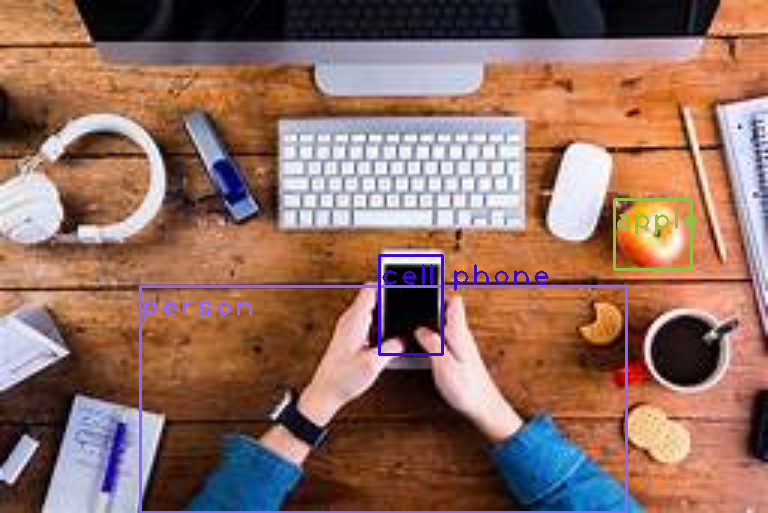

In [58]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/gdrive/My Drive/EVA4/S13A/yolo/image.jpg")
img = cv2.resize(img, None, fx=3, fy=3)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
#print(outs)
for out in outs:
    #print(len(out))
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
#print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 2, color, 2)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

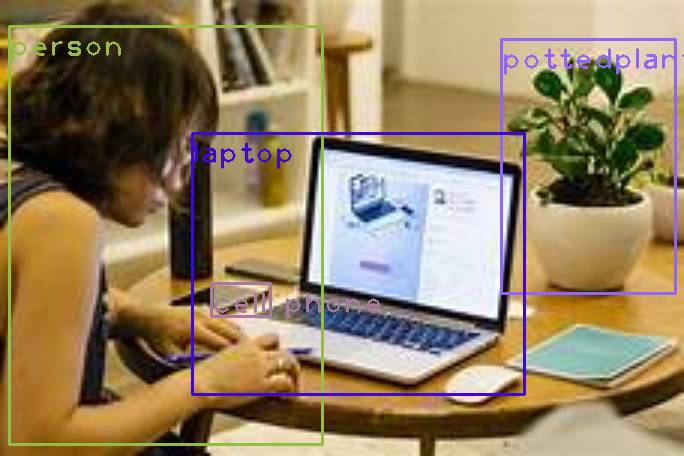

In [59]:

import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread("/content/gdrive/My Drive/EVA4/S13A/yolo/officedesk1.jpg")
img = cv2.resize(img, None, fx=3, fy=3)
height, width, channels = img.shape

# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

net.setInput(blob)
outs = net.forward(output_layers)

# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
#print(outs)
for out in outs:
    #print(len(out))
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
#print(indexes)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 2, color, 2)


cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()